# Using Suport Vector Machine applied to Digits

**Import library's**

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm
import seaborn as sns; sns.set()
%matplotlib inline

**Load the dataset**

In [2]:
digits = datasets.load_digits()

In [3]:
print(digits.data)
print(digits.target)
print("Shape of Digits Dataset: {}".format(digits.images.shape))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
Shape of Digits Dataset: (1797, 8, 8)


**Show some images of mnist dataset**

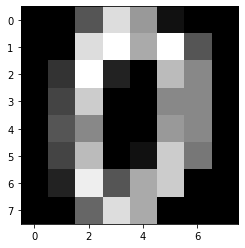

In [4]:
plt.imshow(digits.images[0], cmap='gray', interpolation='nearest')

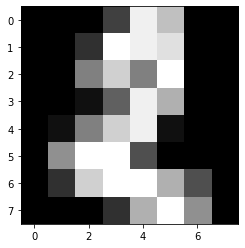

In [5]:
plt.imshow(digits.images[2], cmap='gray', interpolation='nearest')

**Split the dataset in (x_train, y_train) (x_test, y_test)**

In [8]:
X, y = digits.data, digits.target

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [10]:
print("\tShape of digits dataset")
print("X_train: {}\t X_test:{}".format(x_train.shape, x_test.shape))

	Shape of digits dataset
X_train: (1078, 64)	 X_test:(719, 64)


**Create an instance of SVM and fit out data**

In [11]:
C = 1.0 # SVM regularization parameter

clf = svm.SVC(kernel='rbf', gamma=0.01, C=C)

In [13]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Predictions of dataset**

In [30]:
predicted = clf.predict(x_test.data)

**Show the confusion matrix**

In [31]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predicted)

(10.0, 0.0)

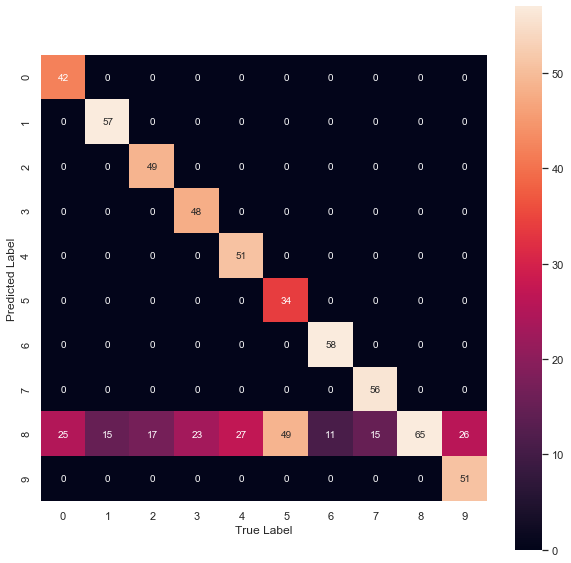

In [49]:
labels = ['0','1','2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10, 10))
ax = sns.heatmap(mat.T, square=True, robust=True, annot=True, fmt='d', xticklabels=labels, yticklabels=labels
           )
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)